# **Predicting Phishing Web Page Using Machine Learning**

# **Importing python libraries** 


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

The maximum number of columns to display in Pandas dataframes to None, meaning that all columns will be displayed when the dataframe is printed.
The code sets the default figure size for matplotlib plots to (12,6) so that plots are large enough to be easily readable

# **Loading Data Set**


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Phishing_Legitimate_full.csv to Phishing_Legitimate_full.csv


In [7]:
data = pd.read_csv('Phishing_Legitimate_full.csv')
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


These lines of code are used to convert the data types of columns in a Pandas DataFrame to reduce memory usage.

The first two lines select columns with data type 'float64' and 'int64' respectively using the select_dtypes method of the DataFrame.

In the next two for-loops, each column selected in the previous steps is cast to a smaller data type. Specifically, 'float64' is cast to 'float32' and 'int64' is cast to 'int32'. These smaller data types use less memory than their larger counterparts and may be sufficient for storing the values in the DataFrame.

In [8]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

The describe() method in Pandas is used to generate descriptive statistics of a DataFrame or a Series. When called on a DataFrame, it will compute and return a summary of statistics for each numeric column in the DataFrame.

In [9]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,

<AxesSubplot:>

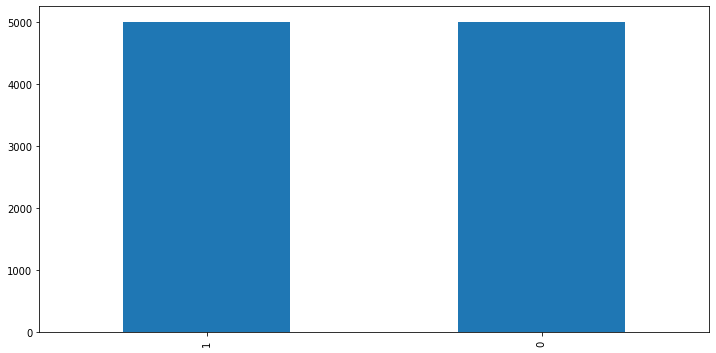

In [10]:
data['CLASS_LABEL'].value_counts().plot(kind='bar')

This line of code is used to plot a bar chart of the value counts for each unique value in the 'CLASS_LABEL' column of the given data set.

# **Spearman Correlation**


The Spearman correlation is a statistical measure that assesses the strength and direction of the association between two variables. 

In [11]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['CLASS_LABEL']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['CLASS_LABEL'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f',cmap='coolwarm')
    plt.show()

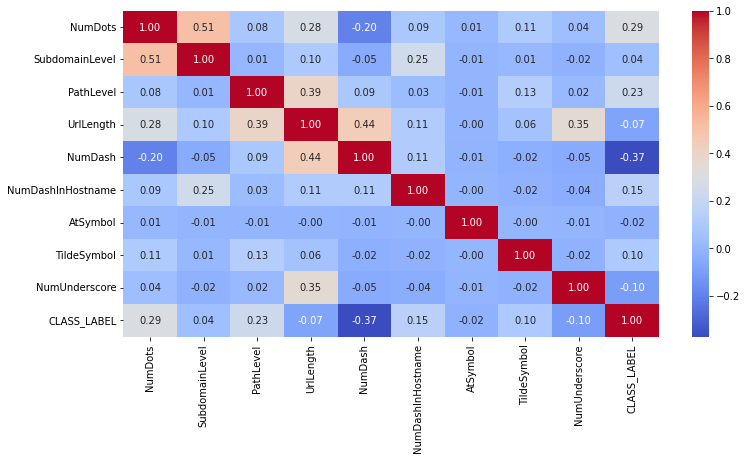

In [12]:
corr_heatmap(data, 0, 10)

From the above heatmap of first 10 columns against CLASS_LABEL, we can concluded that none of the features have strong correlation with the labels.
But, **NumDash** has some significant negative effect towards the CLASS_LABEL, which could mean if there is less number of dash then it is more likely to be phising site.


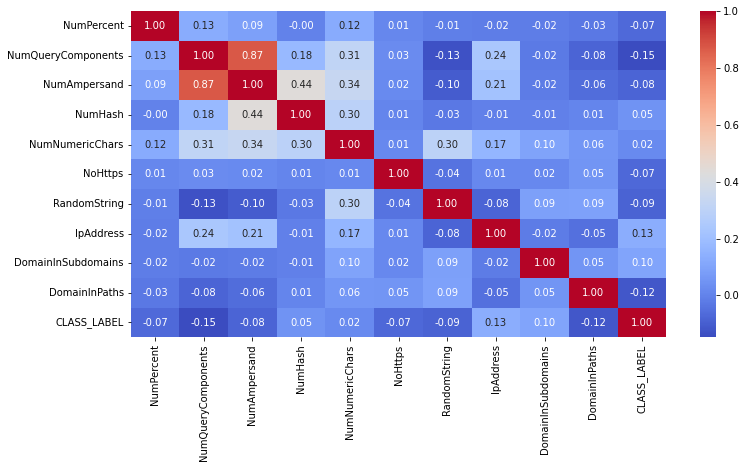

In [13]:
corr_heatmap(data, 10, 20)

From the above heatmap of  column no 10 to 20 against CLASS_LABEL,we come to know that there is no strong or even medium level strength correlation features with CLASS_LABEL

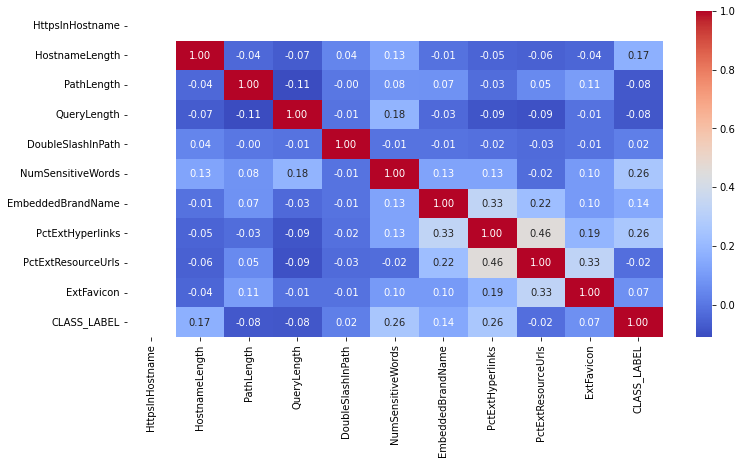

In [14]:
corr_heatmap(data, 20, 30)

From the above heatmap of  column no 20 to 30 against CLASS_LABEL,we come to know that there is no strong or even medium level strength correlation features with CLASS_LABEL

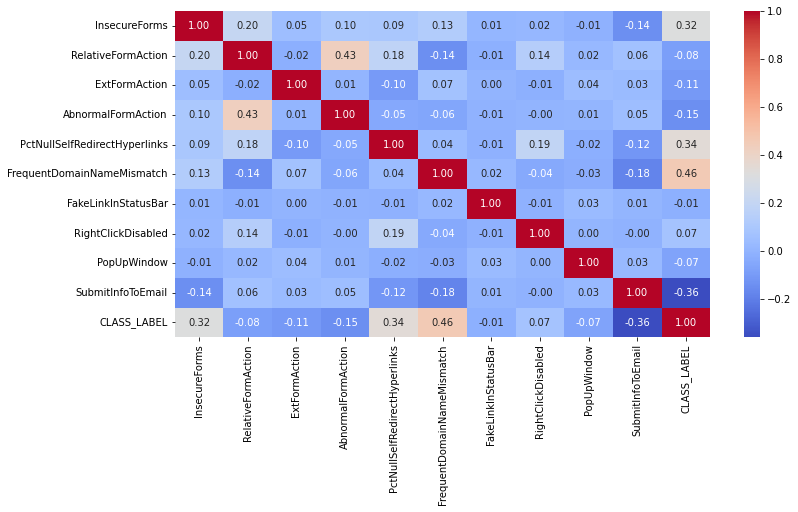

In [15]:
corr_heatmap(data, 30, 40)

From the above heatmap of  column no 30 to 40 against CLASS_LABEL,we come to know that there are few features that are linearly correlated to CLASS_LABEL and they are:


1.   **InsecureForms** shows that as the value is higher so the probability of being a phising site
2.  **PctNullSelfRedirectHyperlinks** shows the same positive correlation as InsecureForms

1.   **FequentDomainNameMismatch** shows that it has medium linear correlation in positive direction
2.   **SubmitInfoToEmail** seems to indicate that sites that ask users to submit their details to emails seems to be more high probability for phising










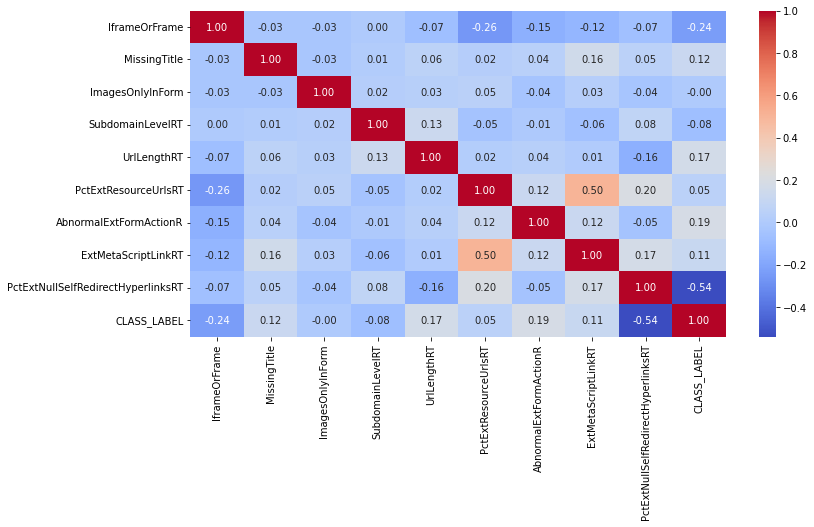

In [16]:
corr_heatmap(data, 40, 50)

From the above heatmap of column no 40 to 50 against CLASS_LABEL,we come to know that **PctExtNullSelfRedirectHyperlinksRT** has corelation with CLASS_LABEL and it has negative effect towards labels which could mean that when the number of percent of null self redirect hyperlinks occur hence the probabiliy of phising increases

# **Mutual Info Classifier**

Mutual information (MI) is a measure of the mutual dependence between two random variables. In the context of machine learning, MI can be used for feature selection, where we aim to identify the most relevant features for a given classification task.



In [17]:
from sklearn.feature_selection import mutual_info_classif

To implement a mutual information classifier, we can use the mutual_info_classif function from the sklearn.feature_selection module in Python. This function takes in the feature matrix and target vector as inputs, and returns an array of MI scores for each feature.

In [18]:
X = data.drop(['id', 'CLASS_LABEL'], axis=1)
y = data['CLASS_LABEL']

In [19]:
discrete_features = X.dtypes == int

In [20]:
mi_score = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_score = pd.Series(mi_score, name='MI Scores', index=X.columns)
mi_score = mi_score.sort_values(ascending=False)
mi_score

PctExtHyperlinks                      0.472971
PctExtResourceUrls                    0.290733
PctNullSelfRedirectHyperlinks         0.234375
PctExtNullSelfRedirectHyperlinksRT    0.216143
FrequentDomainNameMismatch            0.134595
NumNumericChars                       0.132252
NumDash                               0.114675
ExtMetaScriptLinkRT                   0.113456
SubmitInfoToEmail                     0.076160
NumDots                               0.066270
QueryLength                           0.058479
InsecureForms                         0.055510
PathLevel                             0.055335
PathLength                            0.053346
UrlLength                             0.042371
NumSensitiveWords                     0.038766
NumQueryComponents                    0.035066
PctExtResourceUrlsRT                  0.032829
IframeOrFrame                         0.029539
AbnormalExtFormActionR                0.025421
NumAmpersand                          0.021723
HostnameLengt

In the context of feature selection, we compute the MI scores between each feature and the target variable, and select the features with the highest MI scores as the most relevant features for the classification task.



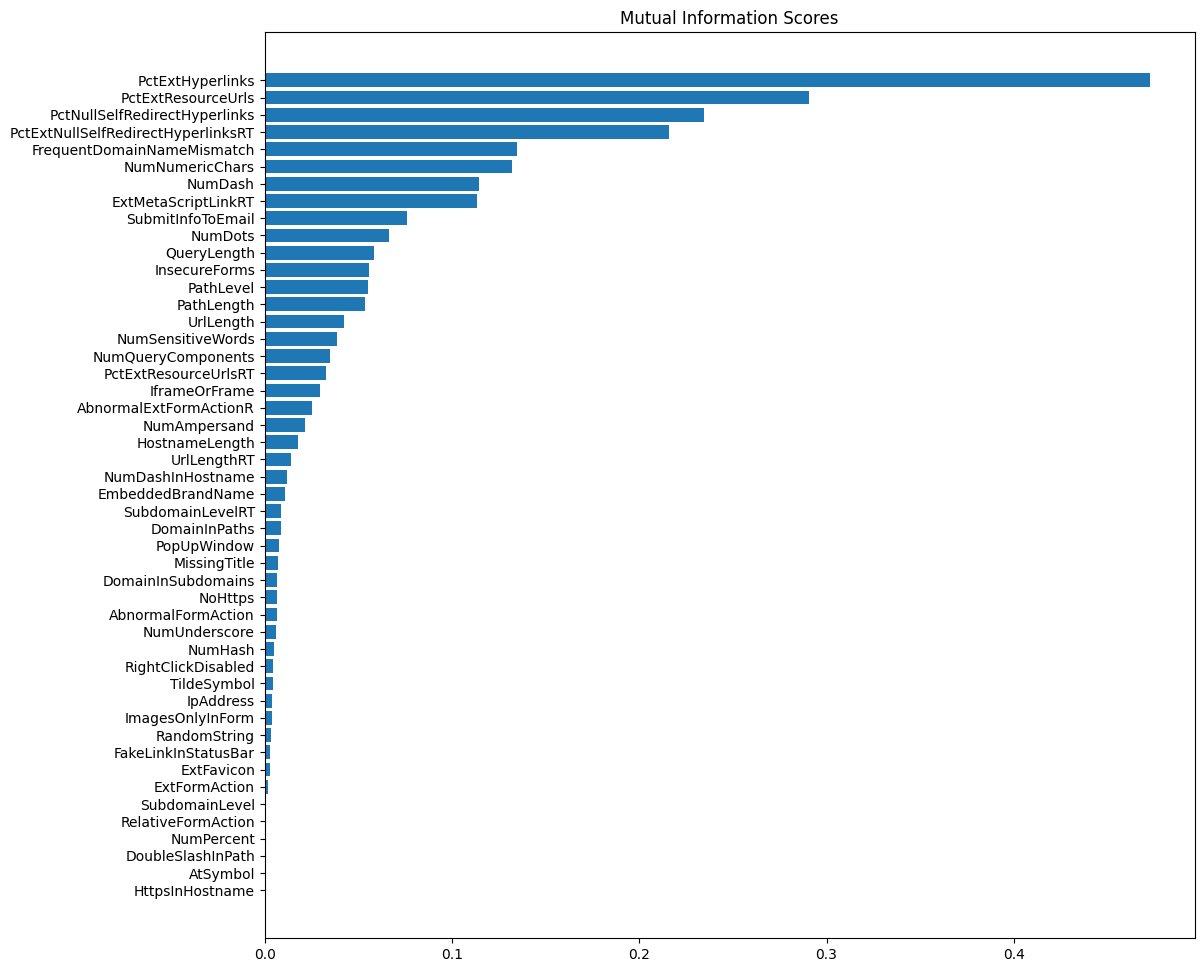

In [21]:
def plot_mi_score(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_score(mi_score)

# **Prediction using Logistic Regression**

Logistic regression is a statistical model used for binary classification problems, where the goal is to predict a binary output variable (e.g. 0 or 1) based on one or more input variables (also called features or predictors). The model uses a logistic function to map the input features to the probability of the output variable.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [23]:
def train_logistic(data, top_n):
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['CLASS_LABEL']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

This code loads the dataset, splits the data into training and testing sets, creates a logistic regression model, trains the model on the training data, makes predictions on the testing data, and calculates precision, recall, F1 score, and accuracy 

In [24]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.913913913913914, recall : 0.9316326530612244, f1 score : 0.922688226376958, accuracy : 0.9235
Performance for Logistic Model with Top 21 features is precision : 0.928643216080402, recall : 0.924924924924925, f1 score : 0.9267803410230692, accuracy : 0.927
Performance for Logistic Model with Top 22 features is precision : 0.9377551020408164, recall : 0.9348931841302136, f1 score : 0.936321956189506, accuracy : 0.9375
Performance for Logistic Model with Top 23 features is precision : 0.9280155642023347, recall : 0.9399014778325123, f1 score : 0.933920704845815, accuracy : 0.9325
Performance for Logistic Model with Top 24 features is precision : 0.924901185770751, recall : 0.9322709163346613, f1 score : 0.9285714285714285, accuracy : 0.928
Performance for Logistic Model with Top 25 features is precision : 0.9164149043303121, recall : 0.9420289855072463, f1 score : 0.9290454313425216, accuracy : 0.9305
Performance for Log

Here the loop will be starting from 20 as we will start training with top 20 features up to all 50 features to find optimal number of features needed for this problem

In [25]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.913914,0.931633,0.922688,0.9235
1,21,0.928643,0.924925,0.926780,0.9270
2,22,0.937755,0.934893,0.936322,0.9375
3,23,0.928016,0.939901,0.933921,0.9325
4,24,0.924901,0.932271,0.928571,0.9280
5,25,0.916415,0.942029,0.929045,0.9305
6,26,0.924303,0.936428,0.930326,0.9305
7,27,0.923310,0.943299,0.933197,0.9345
8,28,0.915303,0.953862,0.934185,0.9330
9,29,0.931206,0.942482,0.936810,0.9370


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

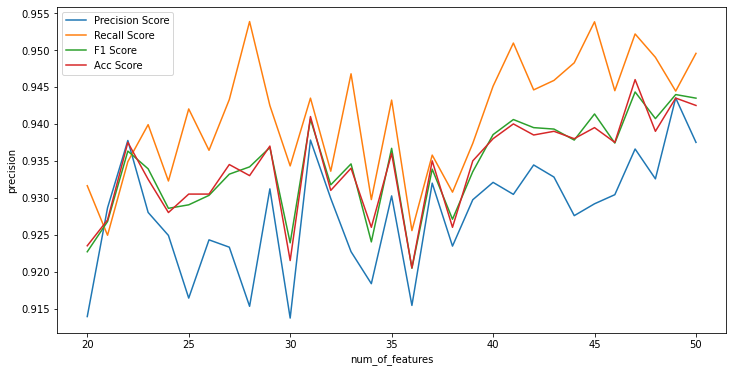

In [26]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

As we can see, the model had ups and downs during the training as more number of features were added, as our target is to maximize all the metrics we have to find the number of features that gives us the best of all metrics, from the figure below, we can see that recall is constantly performing good but our model tend to have problem with precision score, hence to choose the best N of features, we have to pick the area where all the metrics are performing and based on the figure I would say its around 39 features

# **Random Forest Classifier**

A Random Forest classifier is a popular machine learning algorithm used for classification tasks. It is an ensemble method that combines multiple decision trees, where each decision tree is trained on a subset of the data and a random subset of the features.

In [33]:
def train_rfc(data, top_n):
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['CLASS_LABEL']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = RandomForestClassifier(n_estimators=500,max_depth=12,max_features=1.0)
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

It is the same method as logistic reggression, the only difference is that we are now using random forest classifier for training and trying to beat the logistic regression baseline

In [34]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_rfc(data, i)
    print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for RFC Model with Top 20 features is precision : 0.9697560975609756, recall : 0.9831849653808111, f1 score : 0.9764243614931238, accuracy : 0.976
Performance for RFC Model with Top 21 features is precision : 0.9808080808080808, recall : 0.9808080808080808, f1 score : 0.9808080808080808, accuracy : 0.981
Performance for RFC Model with Top 22 features is precision : 0.9634387351778656, recall : 0.9868421052631579, f1 score : 0.975, accuracy : 0.975
Performance for RFC Model with Top 23 features is precision : 0.9718026183282981, recall : 0.9826883910386965, f1 score : 0.9772151898734177, accuracy : 0.9775
Performance for RFC Model with Top 24 features is precision : 0.9655511811023622, recall : 0.9751491053677932, f1 score : 0.9703264094955489, accuracy : 0.97
Performance for RFC Model with Top 25 features is precision : 0.9704480457578646, recall : 0.9704480457578646, f1 score : 0.9704480457578646, accuracy : 0.969
Performance for RFC Model with Top 26 features is precision

In [35]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df.head()

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.969756,0.983185,0.976424,0.9760
1,21,0.980808,0.980808,0.980808,0.9810
2,22,0.963439,0.986842,0.975000,0.9750
3,23,0.971803,0.982688,0.977215,0.9775
4,24,0.965551,0.975149,0.970326,0.9700


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

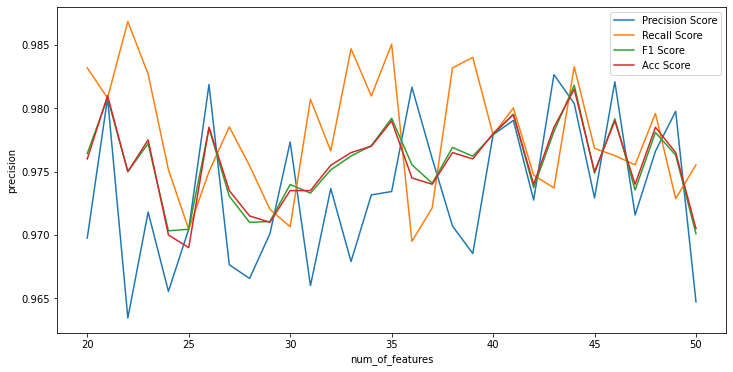

In [36]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

As we can see, the model had ups and downs during the training as more number of features were added, as our target is to maximize all the metrics we have to find the number of features that gives us the best of all metrics, from the figure below, we can see that recall is constantly performing good but our model tend to have problem with precision score, hence to choose the best N of features, we have to pick the area where all the metrics are performing and based on the figure I would say its around 32 features

Now let's train the final random forest model based on the optimal N number of features.

# **Final Random Forest Model**

In [37]:

    top_n_features = mi_score.sort_values(ascending=False).head(32).index.tolist()
    X = data[top_n_features]
    y = data['CLASS_LABEL']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = RandomForestClassifier(n_estimators=500,max_depth=12,max_features=1.0)
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(27, precision, recall, f1, accuracy))

Performance for RFC Model with Top 27 features is precision : 0.9713438735177866, recall : 0.9810379241516967, f1 score : 0.9761668321747766, accuracy : 0.976


# **Performance**

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       998
           1       0.97      0.98      0.98      1002

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



The model is now capable of predicting at up to 98% accuracy and also precision and recall, this shows the model has high confidence in predicting phishing or non-phishing site